In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


In [5]:
import density

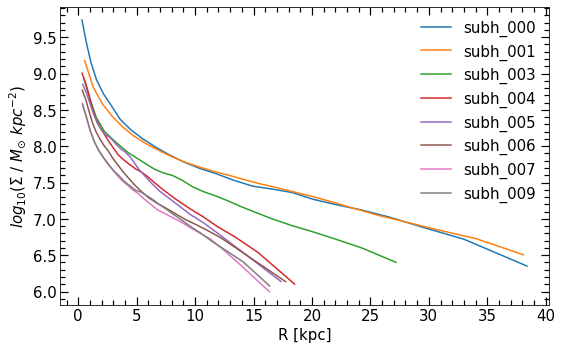

In [47]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    
    nbin = 25
    den = density.surf_density(R,mstr[limit]*1e10,nbin)
    
    ax.plot(den[1],np.log10(den[0]), ls='-', label='subh_'+str('%03d'%j))

ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
ax.legend(fontsize=15,frameon=False)

fig.savefig('../_imagenes/surf_density.png',dpi=100, xxbox_inches='tight')

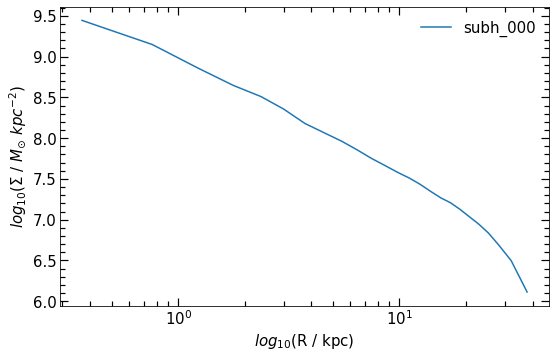

In [49]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines


path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:1]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    age_ = age[limit]
    
    edades, = np.where((age_>4) & (age_<10)) 
    
    R = np.sqrt(xn[limit][edades]**2+yn[limit][edades]**2)
    mass = mstr[limit][edades]
    
    nbin = 25
    den = density.surf_density(R,mass*1e10,nbin)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    ax.plot(den[1],np.log10(den[0]), ls='-', label='subh_'+str('%03d'%j))
    ax.set_xscale('log')
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('$log_{10}$(R / kpc)',fontsize=15)
    ax.legend(fontsize=15,frameon=False)

#     fig.savefig('../_imagenes/surf_density.png',dpi=100, xxbox_inches='tight')

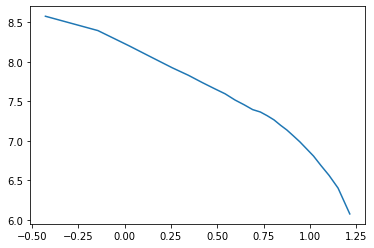

In [46]:
plt.plot(np.log10(den[1]),np.log10(den[0]))

In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:1]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    
    nbin = 30
    den = density.surf_density(R,mstr[limit]*1e10,nbin)
    
# fig.savefig('../_imagenes/surf_density.png',dpi=100, xxbox_inches='tight')

Text(0.5, 0, 'R [kpc]')

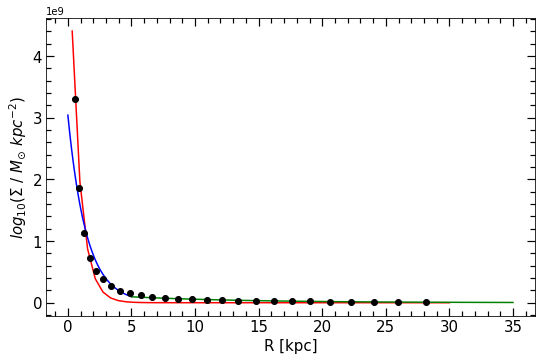

In [82]:
from scipy.stats import powerlaw
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

cut, = np.where((den[1]>0.34)&(den[1]<30))
x2 = np.linspace(0.34,30,50)
f = func(x2,popt[0],popt[1],popt[2],popt[3])
ax.plot(x2,f,'-r')
ax.plot(x,np.exp(y),'-b')
ax.plot(x1,np.exp(y1),'-g')
ax.plot(den[1][cut],den[0][cut],'ko')
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
# ax.legend(fontsize=15,frameon=False)

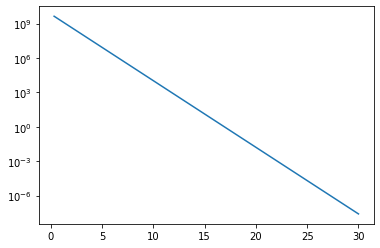

In [83]:
x2 = np.linspace(0.34,30,50)
f = func(x2,popt[0],popt[1],popt[2],popt[3])
plt.plot(x2,f)
plt.yscale('log')

In [80]:
def func(x,a,b,c,d):
    f = a*np.exp(b*x) + c*np.exp(-d*x)
    return f

In [81]:
from scipy.optimize import curve_fit
# cut, = np.where(den[1]>0.34)
cut, = np.where((den[1]>0.34)&(den[1]<30))
param = np.asarray([p1[1],p1[0],p[1],p[0]])
popt, pcov = curve_fit(func,den[1][cut],den[0][cut],p0=param)

In [41]:
popt

array([-2.24290494e+08,  1.59790013e+05,  6.94388254e+09,  1.33790284e+00])

In [76]:
cut0, = np.where((den[1]>0.34)&(den[1]<5))
p = np.polyfit(den[1][cut0],np.log(den[0][cut0]),1)

In [77]:
x = np.linspace(0,5)
y = p[0]*x+p[1]

In [78]:
cut1, = np.where((den[1]>5)&(den[1]<35))
p1 = np.polyfit(den[1][cut1],np.log(den[0][cut1]),1)

In [79]:
x1 = np.linspace(5,35)
y1 = p1[0]*x1+p1[1]

In [174]:
print(p1[0],p1[1])

-0.04685066242205765 8.223648487258462


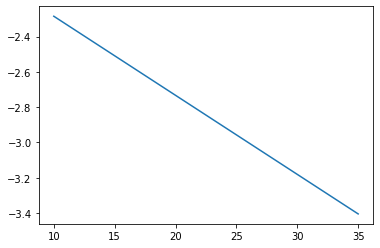

In [24]:
plt.plot(x,y)